<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/confounding/01_workshop_confounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

#**Config**

In [ ]:
pd.options.display.float_format = '{:.20f}'.format

# **Método para la detección de variable confusa atrevés de la correlación lineal**
---



In [ ]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Cars93.csv'
data = pd.read_csv(url)

In [ ]:
data.head(2)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.90000000000000035527,15.90000000000000035527,18.80000000000000071054,25,31,None,Front,...,5,177,102,68,37,26.50000000000000000000,11.00000000000000000000,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.19999999999999928946,33.89999999999999857891,38.70000000000000284217,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.00000000000000000000,15.00000000000000000000,3560,non-USA,Acura Legend


- Se introduce la variable de confusión

In [ ]:
data['log_price'] = np.log(data['Price'])

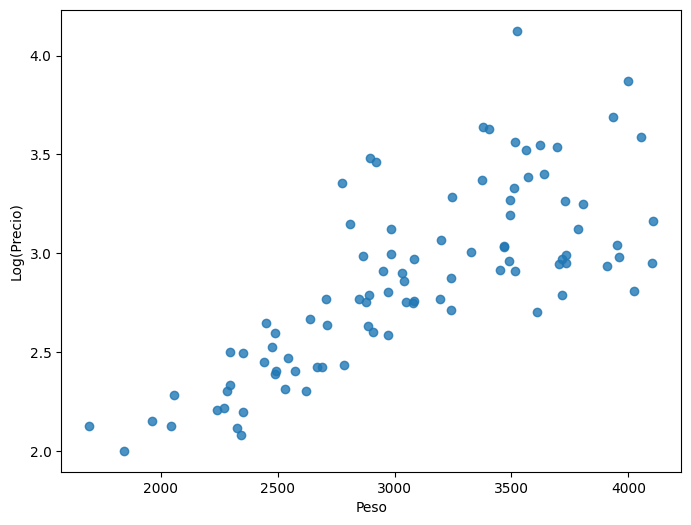

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x=data.Weight, y=data.log_price, alpha= 0.8)
ax.set_xlabel('Peso')
ax.set_ylabel('Log(Precio)');

# **Correlación Lineal**
---

In [ ]:
pg.corr(x = data['Weight'], y = data['log_price'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,93,0.76354397913875726722,"[0.66, 0.84]",0.00000000000000000056,1.069e+16,0.99999999999998623323


- La correlación entre el peso y el logaritmo de peso es alta r = 0.763544 y significativa p ≈ 0.

# **Correlación Parcial**
---



- Se bloquea la variable potencia del motor

In [ ]:
pg.partial_corr(
    data=data,
    x='Weight',
    y='log_price',
    covar='Horsepower',
    method='pearson')

,n,r,CI95%,p-val
pearson,93,0.40474137842567081691,"[0.22, 0.56]",0.00006288649255244899


- Bloqueando la variable potencia de motor reduce la correlación (r=0.404741)

# **Conclusión**
---
- Se puede concluir que existe una relación lineal entre el peso y el logaritmo del precio, se encuentra influenciada por el efecto de la variable potencia de motor.


# **Referencias**
---

- https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

# **Utilidades**
---



In [ ]:
data.columns.to_list()

['Manufacturer',
 'Model',
 'Type',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Man.trans.avail',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight',
 'Origin',
 'Make',
 'log_price']

In [ ]:
def confounding_variable_detection(
    data:pd.DataFrame,
    X: str,
    y: str,
    method:str='pearson',
    **kwargs
    )->pd.DataFrame:
  """Permite identificar variables confusas"""
  result = pd.DataFrame(columns=['confounding','n','r','CI95%','p-val'])

  if kwargs and kwargs['confounding']:
    result = pg.partial_corr(
        data=data,
        x=X,
        y=y,
        covar=kwargs['confounding'],
        method=method)
  else:
    for d in data.columns.to_list():
      if d not in [X, y]:
        try:
          temp = pg.partial_corr(
              data=data,
              x=X,
              y=y,
              covar=str(d),
              method=method)
          temp['confounding'] = d
          result = pd.concat([result, temp], axis = 0)
        except Exception as e:
          print(e)

  result = result.sort_values(by='r')
  return result


In [ ]:
confounding_variable_detection(data, 'Weight', 'log_price')

,confounding,n,r,CI95%,p-val
pearson,Fuel.tank.capacity,93,0.36845436041451384845,"[0.18, 0.53]",0.00030176220531361823
pearson,Horsepower,93,0.40474137842567081691,"[0.22, 0.56]",0.00006288649255244899
pearson,MPG.city,93,0.43324128950808299399,"[0.25, 0.59]",0.00001605767563264488
pearson,EngineSize,93,0.50120699145508851302,"[0.33, 0.64]",0.00000036036021225579
pearson,MPG.highway,93,0.51751710893588320772,"[0.35, 0.65]",0.00000012743983767386
pearson,Min.Price,93,0.55119491455321611983,"[0.39, 0.68]",0.00000001243559617575
pearson,Length,93,0.57862352419280871363,"[0.42, 0.7]",0.00000000153103612139
pearson,Wheelbase,93,0.60378646285546710981,"[0.46, 0.72]",0.00000000018761341537
pearson,Width,93,0.64723362991884281215,"[0.51, 0.75]",0.00000000000314148645
pearson,Rev.per.mile,93,0.64848479588562979448,"[0.51, 0.75]",0.00000000000276527162


- Si se bloquea la variable Fuel.tank.capacity, el coeficiente de correlación parcial ('r') entre Weight y log_price se reduce a 0.36, entre un intervalo de confianza 0.18 y 0.53, donde hay evidencia suficiente para rechazar la hipótesis nula (no hay correlación entre las variables Weight y log_price). Pese a que se rechaza la hipótesis nula, los intervalos de confianza son bajos también y el coeficiente de correlación parcial también es bajo, podríamos considerar a la variable Fuel.tank.capacity como una variable de control que genera una relación espuria en menor nivel, subestimando el efecto


In [ ]:
confounding_variable_detection(data, 'Weight', 'log_price', **{'confounding':'Horsepower'})

,n,r,CI95%,p-val
pearson,93,0.40474137842567081691,"[0.22, 0.56]",0.00006288649255244899
